In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from impyute.imputation.cs import mice
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
import numpy as np
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
from sklearn.metrics import f1_score


In [2]:
%store -r SpecSlopDf_final
%store -r target
#print(target)
x = SpecSlopDf_final
#classed = SpecSlopDf_final['BLAZ']/8
y = target
display(y)

0      1
1      1
3      1
4      1
5      1
      ..
940    1
941    1
948    1
959    1
960    1
Name: BLAZ, Length: 469, dtype: int64

In [3]:
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_curve, roc_curve, plot_precision_recall_curve

In [4]:
#x_train,x_test,y_train,y_test = train_test_split(SpecSlopDf_finaldat,SpecSlopDf_final_target,random_state=0,test_size=0.15)

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0 ,train_size=0.1)

In [6]:
svm = SVC(kernel='rbf',gamma = 'auto', class_weight='balanced', probability=True)
svm.fit(x,y)
class_pred_svm = svm.predict(x)
acc = accuracy_score(class_pred_svm,y)
print(acc)
#print(svm.score(x_test,y_test))
list1 = class_pred_svm.tolist()


0.8230277185501066


In [7]:
#x_train,x_test,y_train,y_test = train_test_split(normalized_NOXR,mode,random_state=0 ,train_size=0.1)


gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)
acc_gnb_split = accuracy_score(y_test,y_pred)
scores = cross_val_score(gnb,x_train,y_train, cv =5)
mat = confusion_matrix(y_test,y_pred)
#sns.heatmap(mat,square=True,annot=True)
#y_pred
print(acc_gnb_split,scores)

0.7375886524822695 [0.7        0.55555556 0.66666667 0.66666667 0.66666667]


In [8]:
knc = KNeighborsClassifier(2)
knc.fit(x_train,y_train)
pred_knc = knc.predict(x_test)

list4 = pred_knc.tolist()
acc_knc = accuracy_score(y_test,pred_knc)
acc_knc

0.6808510638297872

In [9]:
%store -r CLASSED_SDSS
pd.set_option("display.max_columns", None)

CLASSED_SDSS



objid          ra        dec         u         g         r  \
0    1237661871320268811  155.889596  39.886869  18.28582  18.18858  18.01644   
1    1237673808119464381  124.272881  19.978564  21.12064  20.48794  19.87833   
3    1237671936041681101  255.352643  39.910305  17.23728  16.65306  16.19567   
4    1237671123757891809  128.930043   9.621656  19.18801  18.69809  18.26784   
5    1237668625158897767  182.465669  18.168568  19.36534  18.94394  18.62410   
..                   ...         ...        ...       ...       ...       ...   
957  1237671940872077481  229.446350  59.215517  20.70522  20.17446  19.66630   
958  1237671990264201620  201.153390   8.287543  19.72555  17.83748  16.87615   
961  1237674475439849747  176.639395  60.808852  22.69827  21.55093  20.49195   
962  1237674479735013565  223.725938  63.169457  23.32895  19.70775  18.50992   
963  1237679437737754823   28.163253  -7.979178  19.11386  18.78609  18.43992   

            i         z  type  petroFlux_u  petroFlux_g  petroFlux_r  \
0    17.96217  17.88329     6    46.070020    51.004710    59.930150   
1    19.46459  19.10920     6     3.485241     6.428905    10.866150   
3    15.85146  15.56400     6   122.554700   209.925900   320.388100   
4    17.96803  17.68000     6    20.288140    31.331820    46.905930   
5    18.45460  18.21095     6    17.571520    25.539310    34.075170   
..        ...       ...   ...          ...          ...          ...   
957  19.30360  19.12987     6     5.185864     8.377209    13.225580   
958  16.46071  16.13076     3    14.384080    70.357580   171.179100   
961  19.30350  19.14915     3   -37.477890     1.440477     8.230171   
962  18.03288  17.55391     3     2.105196    13.525170    40.307160   
963  18.37883  18.31015     6    23.356640    30.072380    40.518010   

     petroFlux_i  petroFlux_z   run  rerun  camcol  field  \
0       62.00322     67.37818  3818    301       1     23   
1       16.35900     26.03238  6597    301       3    196   
3      435.24300    573.18370  6161    301       4     60   
4       61.68103     81.41004  5972    301       3     89   
5       39.24296     50.78510  5390    301       5     62   
..           ...          ...   ...    ...     ...    ...   
957     18.38704     21.68579  6162    301       5     38   
958    251.56620    321.16380  6174    301       1     38   
961     23.32760     21.29795  6752    301       6     41   
962     63.75335    101.66140  6753    301       6     44   
963     41.82964     44.62999  7908    301       1     42   

               specobjid   class  redshift  plate    mjd  fiberid    peak  \
0    5131971165833940992     QSO  1.332958   4558  55569      434   62.13   
1    5051008627441422336     QSO  5.153141   4486  55588      806  271.16   
3    6826401606239801344    STAR  0.003382   6063  56098      256  250.98   
4    5949364057824055296     QSO  1.406709   5284  55866      396   70.05   
5    6584384252401700864     QSO  0.844779   5848  56029      442   62.69   
..                   ...     ...       ...    ...    ...      ...     ...   
957  7645045468171620352     QSO  0.640455   6790  56430      673    3.78   
958  6112744890537627648  GALAXY  0.117299   5429  55979      852    7.51   
961  7991796529953525760     QSO  0.236626   7098  56661      578    7.40   
962  7862413694587916288  GALAXY  0.272137   6983  56447      926    1.15   
963  8067198287634255872     QSO  1.045397   7165  56603      456    0.00   

            cat  R_maggies  Log_R_Flux  Log_Redshift      u-g      g-z  \
0    BLAZGRFLAT  17.110046    1.233251      0.124816  0.09724  0.30529   
1    BLAZGRFLAT  74.675039    1.873175      0.712072  0.63270  1.37874   
3    BLAZGRFLAT  69.117647    1.839589     -2.470807  0.58422  1.08906   
4    BLAZGRFLAT  19.291143    1.285358      0.148204  0.48992  1.01809   
5    BLAZGRFLAT  17.264265    1.237148     -0.073257  0.42140  0.73299   
..          ...        ...         ...           ...      ...      ...   
957  

In [10]:
##filtering the data by removing the XR catalogue then readding the matched candidates only that emerged as fermi sources
CLASSED_SDSS_NOXR = CLASSED_SDSS[(CLASSED_SDSS['cat']!='BLAZXR')]
#isolating XR data
CLASSED_SDSS_XR = CLASSED_SDSS[(CLASSED_SDSS['cat']=='BLAZXR')]
#finding the matched data to be concat to the rest of the catalogues
CLASSED_SDSS_XR_matched = CLASSED_SDSS_XR[(CLASSED_SDSS_XR['BLAZ']==1)]

#this is the data set to predict the model onto
CLASSED_SDSS_XR_unmatched = CLASSED_SDSS_XR[(CLASSED_SDSS_XR['BLAZ']==0)]
#this is the data set to train the model to, this inclues the matched subfermi levels seen in the XR catalogue
CLASSED_SDSS_TRAIN = pd.concat([CLASSED_SDSS_NOXR,CLASSED_SDSS_XR_matched])
print(len(CLASSED_SDSS_XR_matched))
print(len(CLASSED_SDSS_NOXR[CLASSED_SDSS_NOXR['BLAZ']==0]))

snsplot = pd.DataFrame(CLASSED_SDSS_NOXR,columns=['Log_R_Flux','u-g','g-z','Log_Redshift','a_Rr','a_ri','a_Ru','a_ru','a_iu','Log_g_Flux','BLAZ'])


92
193


In [11]:
# #DF_NOXR = pd.DataFrame(CLASSED_SDSS_TRAIN,columns=['a_Ri','g-z','petroFlux_z','Log_R_Flux','redshift','a_Ru','a_Rz','r'] )#'u-g','g-z','Log_Redshift','Log_R_Flux',
# DF_NOXR = pd.DataFrame(CLASSED_SDSS_TRAIN,columns=['Log_R_Flux','u-g','g-z','redshift','a_Rg','a_Rr','a_gu','a_ri','a_Ru','a_iz','a_zu','a_ru','a_iu','petroFlux_u','petroFlux_i','petroFlux_g'])
# imputed_NOXR = mice(DF_NOXR.values)
# normalized_NOXR = preprocessing.normalize(imputed_NOXR)
# scaler = MinMaxScaler(feature_range=(0,7))
# Scaled_data = scaler.fit_transform(imputed_NOXR)
# CLASSED_SDSS_XR = CLASSED_SDSS[(CLASSED_SDSS['cat']=='BLAZXR')]

# #,a_ru','a_gu','a_ri','a_gi','a_rz','a_gz','a_iz','a_iu','a_zu'

In [12]:
mode  = CLASSED_SDSS_TRAIN['BLAZ'] 
%store mode
#x_train,x_test,y_train,y_test = train_test_split(Scaled_data,mode,random_state=0,test_size=0.10)
#'a_iz','a_iu','a_zu'

Stored 'mode' (Series)


In [13]:
#DF_NOXR_2= pd.DataFrame(CLASSED_SDSS_TRAIN,columns=['Log_R_Flux','u-g','g-z','redshift','a_Rg','a_Rr','a_gu','a_ri','a_Ru','a_iz','a_zu','a_ru','a_iu','petroFlux_u','petroFlux_i','petroFlux_g'])
DF_NOXR = pd.DataFrame(CLASSED_SDSS_TRAIN,columns=['Log_R_Flux','u-g','g-z','redshift','a_Rr','a_ri','a_Ru','a_ru','a_iu','petroFlux_g'])
%store DF_NOXR
imputed_NOXR = mice(DF_NOXR.values)
normalized_NOXR = preprocessing.normalize(imputed_NOXR)
scaler = MinMaxScaler(feature_range=(0,5))
Scaled_data = scaler.fit_transform(imputed_NOXR)
x_train,x_test,y_train,y_test = train_test_split(Scaled_data,mode,random_state=0,test_size=0.10)


#snsplot = DF_NOXR.copy(deep=True)
#snsplot['BLAZ'] = mode.values

#sns.pairplot(snsplot, height = 2,hue = 'BLAZ')
# #g = sns.PairGrid(snsplot, diag_sharey=False, corner=True, hue = 'BLAZ')
sns.set(font_scale = 2)


# g = sns.pairplot(snsplot, hue='BLAZ',)
# for ax in g.axes.flatten():
#     # rotate x axis labels
#     ax.set_xlabel(ax.get_xlabel(), rotation = 45)
#     # rotate y axis labels
#     ax.set_ylabel(ax.get_ylabel(), rotation = 45)
#     # set y labels alignment
#     ax.yaxis.get_label().set_horizontalalignment('right')

    
# #g.map_lower(sns.scatterplot)
# #g.map_diag(sns.kdeplot,fill='TRUE')
# g.add_legend()




Stored 'DF_NOXR' (DataFrame)


In [14]:
#x_train,x_test,y_train,y_test = train_test_split(imputed_NOXR,mode,random_state=0,test_size=0.20)


svm = SVC(kernel='linear',gamma = 'auto', class_weight='balanced', probability=True)

svm.fit(x_train,y_train)

class_pred_svm = svm.predict(x_test)
print(accuracy_score(class_pred_svm,y_test))
#print(class_pred_svm)
#print(y_test.values)
class_pred_svm,y_test.values

0.8936170212765957


(array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 1], dtype=int64),
 array([0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 1], dtype=int64))

In [15]:

# class_pred_svm_2 = svm.predict(x_train)
# print(accuracy_score(class_pred_svm_2,y_train))
# #print(class_pred_svm)


In [16]:
# class_pred_svm_3 = svm.predict(Scaled_data)
# print(accuracy_score(class_pred_svm_3,mode))
# #print(class_pred_svm)

In [17]:
error_knc = []

accuracy_knc = []
for k in range (1,20,1):
    for N in range (-2,4,3):
        
        kncN = KNeighborsClassifier(n_neighbors=k,n_jobs=N)
        kncN.fit(x_train,y_train)
        y_pred = kncN.predict(x_test)
        #y_pred = cross_val_predict(kncN,x_test,y_test,cv = 5)
        
        error_knc.append([np.sqrt(mean_squared_error(y_pred,y_test)),k,N])
        accuracy_knc.append([accuracy_score(y_pred,y_test),k,N])


(accuracy_knc)

[[0.7659574468085106, 1, -2],
 [0.7659574468085106, 1, 1],
 [0.723404255319149, 2, -2],
 [0.723404255319149, 2, 1],
 [0.8297872340425532, 3, -2],
 [0.8297872340425532, 3, 1],
 [0.8085106382978723, 4, -2],
 [0.8085106382978723, 4, 1],
 [0.8723404255319149, 5, -2],
 [0.8723404255319149, 5, 1],
 [0.851063829787234, 6, -2],
 [0.851063829787234, 6, 1],
 [0.851063829787234, 7, -2],
 [0.851063829787234, 7, 1],
 [0.8936170212765957, 8, -2],
 [0.8936170212765957, 8, 1],
 [0.8085106382978723, 9, -2],
 [0.8085106382978723, 9, 1],
 [0.851063829787234, 10, -2],
 [0.851063829787234, 10, 1],
 [0.851063829787234, 11, -2],
 [0.851063829787234, 11, 1],
 [0.851063829787234, 12, -2],
 [0.851063829787234, 12, 1],
 [0.851063829787234, 13, -2],
 [0.851063829787234, 13, 1],
 [0.8723404255319149, 14, -2],
 [0.8723404255319149, 14, 1],
 [0.8723404255319149, 15, -2],
 [0.8723404255319149, 15, 1],
 [0.8723404255319149, 16, -2],
 [0.8723404255319149, 16, 1],
 [0.8936170212765957, 17, -2],
 [0.8936170212765957, 17,

In [18]:
knc = KNeighborsClassifier(n_neighbors=5,n_jobs=1)
knc.fit(x_train,y_train)
pred_knc = knc.predict(x_test)
#pred_knc_2 = knc.predict(imputed_XR)

#list4 = pred_knc.tolist()
acc_knc = accuracy_score(y_test,pred_knc)

acc_knc


0.8723404255319149

what N to use??

In [19]:
# plt.plot(range(1,10),error_knc)


In [20]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)
acc_gnb_split = accuracy_score(y_test,y_pred)
scores = cross_val_score(gnb,x_train,y_train, cv =5)
mat = confusion_matrix(y_test,y_pred)
#sns.heatmap(mat,square=True,annot=True)
#y_pred
print(acc_gnb_split,scores)

0.7872340425531915 [0.63529412 0.72941176 0.66666667 0.63095238 0.70238095]


In [21]:
error_for = []
accuracy_for = []
for k in range (25,151,25):
    for N in range (5,30,5):
        
        ForestN = RandomForestClassifier(n_estimators=k,max_depth=N,random_state=0)
        ForestN.fit(x_train,y_train)
        y_pred = ForestN.predict(x_test)
        #y_pred = cross_val_predict(ForestN,x_test,y_test,cv = 5)
        
        error_for.append([np.sqrt(mean_squared_error(y_pred,y_test)),k,N])
        accuracy_for.append([accuracy_score(y_pred,y_test),k,N])


(accuracy_for)

[[0.8723404255319149, 25, 5],
 [0.8085106382978723, 25, 10],
 [0.8297872340425532, 25, 15],
 [0.8297872340425532, 25, 20],
 [0.8297872340425532, 25, 25],
 [0.8723404255319149, 50, 5],
 [0.8297872340425532, 50, 10],
 [0.851063829787234, 50, 15],
 [0.851063829787234, 50, 20],
 [0.851063829787234, 50, 25],
 [0.8723404255319149, 75, 5],
 [0.851063829787234, 75, 10],
 [0.8297872340425532, 75, 15],
 [0.851063829787234, 75, 20],
 [0.851063829787234, 75, 25],
 [0.851063829787234, 100, 5],
 [0.851063829787234, 100, 10],
 [0.851063829787234, 100, 15],
 [0.8723404255319149, 100, 20],
 [0.8723404255319149, 100, 25],
 [0.8723404255319149, 125, 5],
 [0.851063829787234, 125, 10],
 [0.851063829787234, 125, 15],
 [0.851063829787234, 125, 20],
 [0.851063829787234, 125, 25],
 [0.851063829787234, 150, 5],
 [0.851063829787234, 150, 10],
 [0.851063829787234, 150, 15],
 [0.851063829787234, 150, 20],
 [0.851063829787234, 150, 25]]

In [22]:
forest = RandomForestClassifier(n_estimators=25,max_depth=10,random_state=0) 

forest.fit(x_train,y_train)
pred_forest = forest.predict(x_test)
#pred_knc = knc.predict(imputed_XR)


list4 = pred_forest.tolist()
acc_forest = accuracy_score(y_test,pred_forest)
acc_forest

0.8085106382978723

In [23]:
# error_for = []
# for k in range (1,201,10):
#     ForestN = RandomForestClassifier(n_estimators=k)
#     y_pred = cross_val_predict(ForestN,Scaled_data_2,mode,cv = 5)
#     error_for.append(np.sqrt(mean_squared_error(y_pred,mode)))

In [24]:
#plt.plot(range(1,201,10),error_for)

In [25]:
NN = MLPClassifier(solver='adam',max_iter=2500)
NN.fit(x_train,y_train)
NN_pred = NN.predict(x_test)
acc_NN_split = accuracy_score(y_test,NN_pred)
acc_NN_split

0.9148936170212766

In [26]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
GBC_pred = GBC.predict(x_test)
acc_GBC = accuracy_score(y_test,GBC_pred)
acc_GBC

0.851063829787234

In [27]:
LR = LogisticRegression(solver='lbfgs',max_iter=2000)
LR.fit(x_train,y_train)
LR_pred = LR.predict(x_test)
acc_LR = accuracy_score(y_test,LR_pred)
acc_LR

0.8936170212765957

In [28]:

# NN_pred = NN.predict(Scaled_XR)
# #acc_NN_split = accuracy_score(y_test_2,NN_pred)
# #acc_NN_split
# NN_pred

In [29]:
# pred_svm_2 = svm.predict(x_train)
# pred_forest_2 = forest.predict(x_test_2)
# pred_knc = knc.predict(x_test_2)
# y_pred_2 = gnb.predict(x_test_2)
# NN_pred_2 = NN.predict(x_test_2)


0.8723404255319149 0.9047619047619048


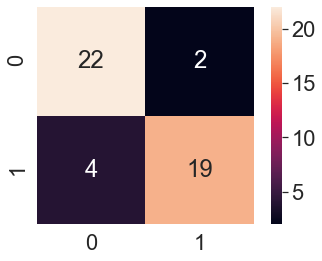

In [30]:
cm = confusion_matrix(y_test,pred_knc)
sns.heatmap(cm,square= True,annot=True,cbar=True)
tp,tn,fp,fn = cm[1,1],cm[0,0],cm[0,1],cm[1,0]
efficiency = (tp+tn)/ (tp+tn+fp+fn)
completness = (tp)/(fp+tp)
print(efficiency,completness)



In [31]:

#x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(Scaled_data, mode,random_state=0,train_size=0.90)
 #[LogisticRegression(solver='lbfgs',max_iter=2000), 
               #MLPClassifier(solver='adam',max_iter=2500),
classifiers = [KNeighborsClassifier(n_neighbors=5,n_jobs=1),
               GradientBoostingClassifier(),
               RandomForestClassifier(n_estimators=25,max_depth=10,random_state=0),
                SVC(kernel='linear',gamma = 'auto', class_weight='balanced', probability=True)]
for cls in classifiers:
    cls.fit(x_train, y_train)

c:\snek\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\snek\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\snek\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.

0.8723404255319149 0.9047619047619048 KNeighborsClassifier 0.8636363636363636
0.8723404255319149 0.8695652173913043 GradientBoostingClassifier 0.8695652173913043
0.8085106382978723 0.7916666666666666 RandomForestClassifier 0.8085106382978723
0.8936170212765957 0.95 SVC 0.8837209302325582


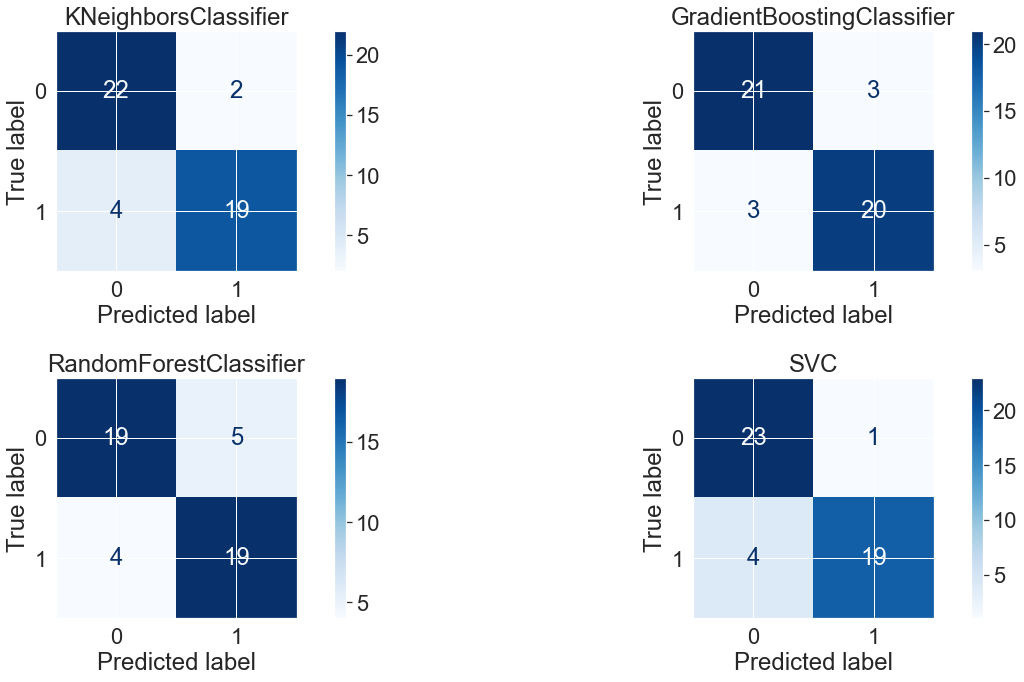

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,10))

for cls, ax in zip(classifiers, axes.flatten()):
    cls.fit(x_train, y_train)
    plot_confusion_matrix(cls, 
                          x_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues')#,
                        # display_labels=Scaled_data['Classification'
    ax.title.set_text(type(cls).__name__)
    r = cls.predict(x_test)
    cm = confusion_matrix(y_test,r)
    tp,tn,fp,fn = cm[1,1],cm[0,0],cm[0,1],cm[1,0]
    efficiency = (tp+tn)/ (tp+tn+fp+fn)
    completness = (tp)/(fp+tp)
    f1 = 2*tp / (2*tp + fp + fn)

    print(efficiency,completness,type(cls).__name__,f1)
   # print(type(cls).__name__)

plt.tight_layout()  
plt.show()


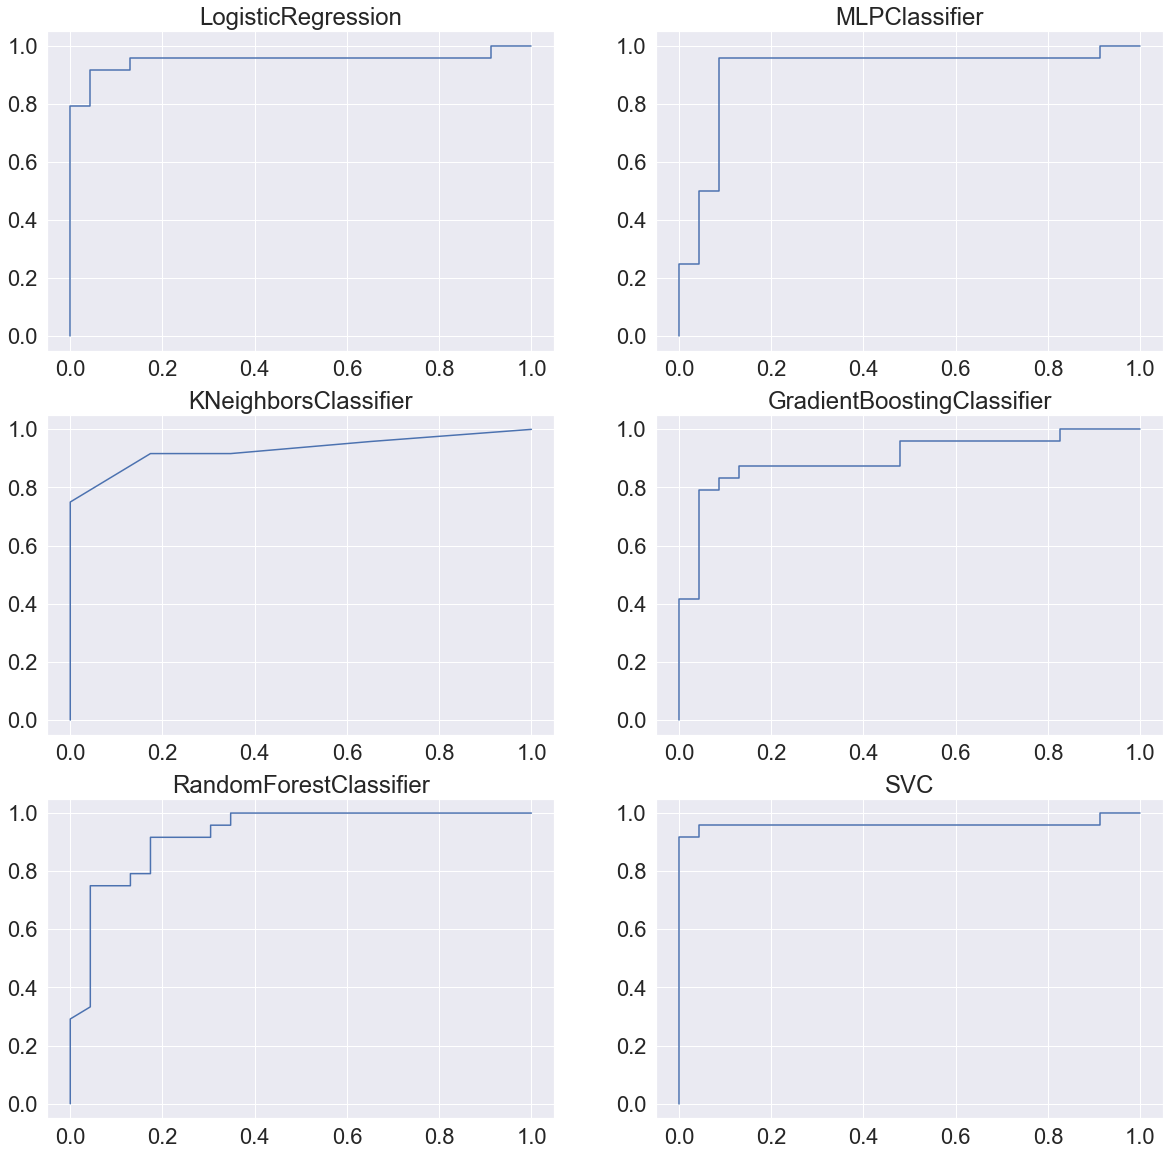

In [33]:
classifiers_2 = [LogisticRegression(solver='lbfgs',max_iter=2000), 
               MLPClassifier(solver='adam',max_iter=2500),
               KNeighborsClassifier(n_neighbors=5,n_jobs=1),
               GradientBoostingClassifier(),
               RandomForestClassifier(n_estimators=25,max_depth=10,random_state=0),
               SVC(kernel='linear',gamma = 'auto', class_weight='balanced', probability=True)]
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,20))

for cls, ax in zip(classifiers_2, axes.flatten()):
    cls.fit(x_train, y_train)
    pred = cls.predict_proba(x_test)
#print(svm_prob)
    prob , rec, thresh = precision_recall_curve(y_test ,pred[:,0])
    tprob , trec, tthresh = roc_curve(y_test, pred[:,0])
    #by peerprint(trec,tprob)
    ax=ax
    ax.plot(trec,tprob)
    ax.title.set_text(type(cls).__name__)


In [34]:
# for cls in classifiers:
#     cls.fit(x_train, y_train)
#     r = cls.predict(x_test)
#     cm = confusion_matrix(y_test,r)
#     tp,tn,fp,fn = cm[1,1],cm[0,0],cm[0,1],cm[1,0]
#     efficiency = (tp+tn)/ (tp+tn+fp+fn)
#     completness = (tp)/(fp+tp)
#     print(efficiency,completness,type(cls).__name__)
#    # print(acc)

## from the accuracy report from above data, fit the models to the data in Blaz XR catalogue

In [35]:

#DF_XR = pd.DataFrame(CLASSED_SDSS_XR_unmatched,columns=['Log_R_Flux','u-g','g-z','redshift','a_Rg','a_Rr','a_gu','a_ri','a_Ru','a_iz','a_zu','a_ru','a_iu','petroFlux_u','petroFlux_i','petroFlux_g'])
DF_XR = pd.DataFrame(CLASSED_SDSS_XR_unmatched,columns=['Log_R_Flux','u-g','g-z','redshift','a_Rr','a_ri','a_Ru','a_ru','a_iu','petroFlux_g'])
%store DF_XR
imputed_XR = mice(DF_XR.values)

display(DF_XR)

Stored 'DF_XR' (DataFrame)


Log_R_Flux      u-g      g-z  redshift      a_Rr      a_ri      a_Ru  \
377    0.686202  0.70885  2.01427  0.535551 -0.089553  4.072211  0.007963   
378   -0.108264  2.29782  3.01253  0.416933 -0.156486  4.371969  0.371500   
379         NaN  2.35365  1.63540  0.117039       NaN  1.774744       NaN   
380    1.130323  2.46596  2.59671  0.331230 -0.079430  3.425597  0.298885   
381   -0.506972  2.32369  2.02900  0.608134 -0.239928  3.541219 -0.140511   
..          ...      ...      ...       ...       ...       ...       ...   
957    0.017442  0.53076  1.04459  0.640455 -0.212081  1.631999 -0.127945   
958    0.315590  1.88807  1.70672  0.117299 -0.368434  1.906906 -0.154531   
961    0.309182  1.14734  2.40178  0.236626 -0.116460  5.160246       NaN   
962   -0.499352  3.62120  2.15384  0.272137 -0.404333  2.270940 -0.150927   
963         NaN  0.32777  0.47594  1.045397       NaN  0.157798       NaN   

          a_ru      a_iu  petroFlux_g  
377   2.078288  2.603514     6.138074  
378  11.580928  9.681991     0.901312  
379   5.576849  4.575323    11.246780  
380   8.330708  7.038636     9.909217  
381   1.970169  2.384004     2.695443  
..         ...       ...          ...  
957   1.658303  1.651374     8.377209  
958   4.386735  3.733515    70.357580  
961        NaN       NaN     1.440477  
962   5.229036  4.449834    13.525170  
963   0.975737  0.760281    30.072380  

[495 rows x 10 columns]

In [36]:
normalized_XR = preprocessing.normalize(imputed_XR)
scaler = MinMaxScaler(feature_range=(0,5))
Scaled_XR = scaler.fit_transform(imputed_XR)

len(DF_XR)

495

In [37]:
pred_svm_2 = svm.predict(Scaled_XR)
pred_forest_2 = forest.predict(Scaled_XR)
pred_knc_2 = knc.predict(Scaled_XR)
NN_pred_2 = NN.predict(Scaled_XR)
LR_pred_2 = LR.predict(Scaled_XR)
GB_pred_2 = GBC.predict(Scaled_XR)

In [38]:
list1 = GB_pred_2.tolist()
list2 = pred_knc_2.tolist()
list3 = NN_pred_2.tolist()
list4 = pred_forest_2.tolist()
list5 = pred_svm_2.tolist()

In [39]:
CLASSED_SDSS_XR_unmatched['GB'] = list1
CLASSED_SDSS_XR_unmatched['knc'] = list2
CLASSED_SDSS_XR_unmatched['NN'] = list3
CLASSED_SDSS_XR_unmatched['for'] = list4
CLASSED_SDSS_XR_unmatched['svm'] = list5




len(CLASSED_SDSS_XR_unmatched[CLASSED_SDSS_XR_unmatched["knc"]==1])
CLASSED_SDSS_XR_unmatched

C:\Users\Zeruel\AppData\Local\Temp/ipykernel_14680/3227060056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CLASSED_SDSS_XR_unmatched['GB'] = list1
C:\Users\Zeruel\AppData\Local\Temp/ipykernel_14680/3227060056.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CLASSED_SDSS_XR_unmatched['knc'] = list2
C:\Users\Zeruel\AppData\Local\Temp/ipykernel_14680/3227060056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

objid          ra        dec         u         g         r  \
377  1237651191899750620  145.513916  59.619312  21.16717  20.45832  19.63850   
378  1237651192432361478  131.868761  53.392841  24.62913  22.33131  20.62788   
379  1237651249892687891  206.579900  62.343167  22.29666  19.94301  19.01134   
380  1237651250430149378  209.890137  62.316810  22.40179  19.93583  18.42065   
381  1237651250431984356  217.691591  60.379086  23.76222  21.43853  20.62962   
..                   ...         ...        ...       ...       ...       ...   
957  1237671940872077481  229.446350  59.215517  20.70522  20.17446  19.66630   
958  1237671990264201620  201.153390   8.287543  19.72555  17.83748  16.87615   
961  1237674475439849747  176.639395  60.808852  22.69827  21.55093  20.49195   
962  1237674479735013565  223.725938  63.169457  23.32895  19.70775  18.50992   
963  1237679437737754823   28.163253  -7.979178  19.11386  18.78609  18.43992   

            i         z  type  petroFlux_u  petroFlux_g  petroFlux_r  \
377  18.72845  18.44405     3     4.393373     6.138074    14.202550   
378  19.78731  19.31878     3     0.007359     0.901312     5.085279   
379  18.56776  18.30761     3     1.025597    11.246780    23.897110   
380  17.83193  17.33912     3     0.317111     9.909217    34.977590   
381  19.73781  19.40953     3     1.815099     2.695443     5.520257   
..        ...       ...   ...          ...          ...          ...   
957  19.30360  19.12987     6     5.185864     8.377209    13.225580   
958  16.46071  16.13076     3    14.384080    70.357580   171.179100   
961  19.30350  19.14915     3   -37.477890     1.440477     8.230171   
962  18.03288  17.55391     3     2.105196    13.525170    40.307160   
963  18.37883  18.31015     6    23.356640    30.072380    40.518010   

     petroFlux_i  petroFlux_z   run  rerun  camcol  field  \
377     32.31665     54.63369  1331    301       5    262   
378     12.29301     17.43492  1331    301       6    197   
379     34.19469     41.30346  1345    301       1    428   
380     69.84791     89.48038  1345    301       2    437   
381     11.28394     19.15139  1345    301       2    465   
..           ...          ...   ...    ...     ...    ...   
957     18.38704     21.68579  6162    301       5     38   
958    251.56620    321.16380  6174    301       1     38   
961     23.32760     21.29795  6752    301       6     41   
962     63.75335    101.66140  6753    301       6     44   
963     41.82964     44.62999  7908    301       1     42   

               specobjid   class  redshift  plate    mjd  fiberid   peak  \
377  6435676965001515008     QSO  0.535551   5716  56684      120  17.63   
378  5806518256878768128  GALAXY  0.416933   5157  55923      918   2.83   
379  7674374391321612288  GALAXY  0.117039   6816  56444      875   0.00   
380  7673195989315112960  GALAXY  0.331230   6815  56419      684  49.02   
381  7664238543129300992     QSO  0.608134   6807  56429      865   1.13   
..                   ...     ...       ...    ...    ...      ...    ...   
957  7645045468171620352     QSO  0.640455   6790  56430      673   3.78   
958  6112744890537627648  GALAXY  0.117299   5429  55979      852   7.51   
961  7991796529953525760     QSO  0.236626   7098  56661      578   7.40   
962  7862413694587916288  GALAXY  0.272137   6983  56447      926   1.15   
963  8067198287634255872     QSO  1.045397   7165  56603      456   0.00   

        cat  R_maggies  Log_R_Flux  Log_Redshift      u-g      g-z      r-i  \
377  BLAZXR   4.855144    0.686202     -0.271199  0.70885  2.01427  0.91005   
378  BLAZXR   0.779357   -0.108264     -0.379934  2.29782  3.01253  0.84057   
379  BLAZXR        NaN         NaN     -0.931668  2.35365  1.63540  0.44358   
380  BLAZXR  13.499670    1.130323     -0.479870  2.46596  2.59671  0.58872   
381  BLAZXR   0.311192   -0.506972     -0.216001  2.32369  2.02900  0.89181   
..      ...        ...         ...           ...      ...    

In [40]:
CLASSED_SDSS_XR_unmatchedf = CLASSED_SDSS_XR_unmatched[(CLASSED_SDSS_XR_unmatched['GB'] == 1) &
          (CLASSED_SDSS_XR_unmatched['knc'] == 1)&
          #(CLASSED_SDSS_XR_unmatched['NN'] == 1)&
          (CLASSED_SDSS_XR_unmatched['for'] == 1)&
          (CLASSED_SDSS_XR_unmatched['svm'] == 1)]
len(CLASSED_SDSS_XR_unmatched[CLASSED_SDSS_XR_unmatched['knc']==1])
CLASSED_SDSS_XR_unmatchedf

objid          ra        dec         u         g         r  \
385  1237651252016644564  117.938129  41.259972  20.40018  19.76607  19.00008   
388  1237651273502294229  140.388771  60.473580  19.89626  18.93623  17.69030   
391  1237651538703679816  142.166641  60.419136  20.77789  19.58320  18.99182   
392  1237651538705383576  148.731996  62.692313  22.84815  22.11622  21.17945   
393  1237651539797344716  237.714533  56.797725  22.37254  21.39497  20.16076   
..                   ...         ...        ...       ...       ...       ...   
947  1237668679917240630  258.011592  44.226969  19.44558  19.11290  19.09152   
949  1237670451053658441  124.210870  12.740587  19.58435  19.53779  19.18395   
950  1237670964855570717  156.249378  17.363175  20.66409  20.15220  19.95886   
953  1237671124834779643  135.827919  12.241033  22.19879  21.52854  20.83834   
957  1237671940872077481  229.446350  59.215517  20.70522  20.17446  19.66630   

            i         z  type  petroFlux_u  petroFlux_g  petroFlux_r  \
385  18.47243  18.11658     3     6.174312    11.873730    25.836300   
388  17.12451  16.82969     3    14.809730    27.176200   119.417800   
391  18.71890  18.53747     3     4.874428    13.160210    24.154180   
392  20.25520  19.86503     6     0.672097     1.136621     2.941630   
393  19.35791  18.88819     3     0.826061     2.838207     8.712428   
..        ...       ...   ...          ...          ...          ...   
947  19.26641  19.09541     6    15.805650    21.691760    22.182140   
949  18.90420  18.33355     3    14.599890    14.619140    21.650860   
950  20.03438  19.79467     6     5.498972     8.615063     9.890953   
953  20.05250  19.58484     3     1.852992     2.054342     4.439136   
957  19.30360  19.12987     6     5.185864     8.377209    13.225580   

     petroFlux_i  petroFlux_z   run  rerun  camcol  field  \
385    43.299740     60.68291  1345    301       5     69   
388   213.832700    192.29760  1350    301       5    234   
391    30.849290     33.59261  1412    301       3     38   
392     7.286791      9.84007  1412    301       3     64   
393    16.624740     24.41931  1412    301       5    342   
..           ...          ...   ...    ...     ...    ...   
947    19.723120     23.68109  5403    301       3     24   
949    29.491560     52.30210  5815    301       6     13   
950     9.468400     11.11048  5935    301       3    264   
953    10.994460     15.31347  5972    301       5    137   
957    18.387040     21.68579  6162    301       5     38   

               specobjid   class  redshift  plate    mjd  fiberid    peak  \
385  4136592628564381696  GALAXY  0.429050   3674  55182      132  202.68   
388  8383564618581430272  GALAXY  0.268350   7446  56722      414    0.00   
391  6435797361524756480  GALAXY  0.154323   5716  56684      558    0.00   
392  6442487328682561536  GALAXY  0.229551   5722  56008      320    0.00   
393  7647308263135137792     QSO  0.530523   6792  56432      713    1.04   
..                   ...     ...       ...    ...    ...      ...     ...   
947  6825448879296892928     QSO  0.873712   6062  56091      886  135.73   
949  5071125291897999360     QSO  0.392640   4504  55571      262    0.00   
950  6009192335812087808     QSO  0.926925   5337  55987      962    2.77   
953  5962977661982887936  GALAXY  0.567198   5296  55922      770    2.91   
957  7645045468171620352     QSO  0.640455   6790  56430      673    3.78   

        cat  R_maggies  Log_R_Flux  Log_Redshift      u-g      g-z      r-i  \
385  BLAZXR  55.816259    1.746761     -0.367492  0.63411  1.64949  0.52765   
388  BLAZXR        NaN         NaN     -0.571299  0.96003  2.10654  0.56579   
391  BLAZXR        NaN         NaN     -0.811569  1.19469  1.04573  0.27292   
392  BLAZXR        NaN         NaN     -0.639121  0.73193  2.25119  0.92425   
393  BLAZXR   0.286407   -0.543017     -0.275296  0.97757  2.50678  0.80285   
..      ...        ...         ...           ... 

In [41]:
from scipy import stats
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.cosmology import FlatLambdaCDM
from astropy.coordinates import match_coordinates_sky
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)


In [42]:
copy_XR = CLASSED_SDSS_XR_unmatchedf.copy(deep=True)
copy_XR_matched = copy_XR[copy_XR['knc']==1]
copy_XR_matched_1 = copy_XR_matched[copy_XR_matched['redshift']>0]
ra = copy_XR_matched['ra']
dec = copy_XR_matched['dec']

eq_xr_coord = SkyCoord(ra*u.degree, dec*u.degree)
gal_xr_coord = eq_xr_coord.galactic
len(copy_XR_matched_1)


177

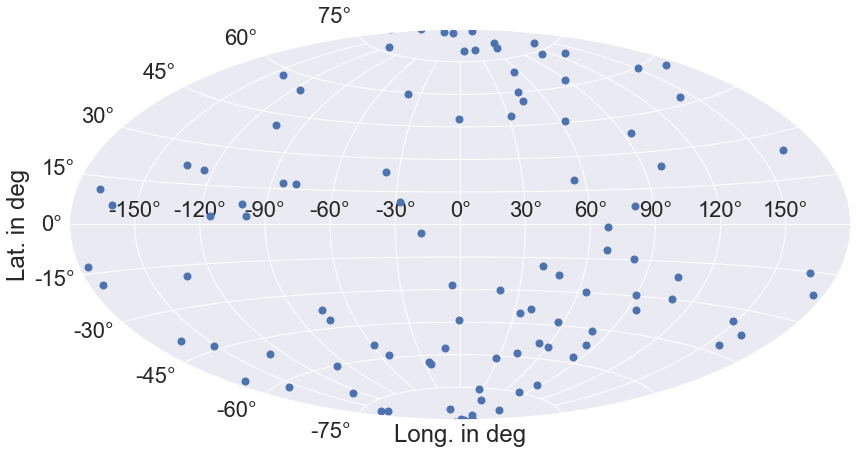

In [43]:
#Plotting in galactic
#plt.style.use('dark_background')
plt.figure(figsize=(14, 14))
plt.rcParams.update({'font.size': 16})

# Apply the aitoff projection and activate the grid
plt.subplot(projection="aitoff")
plt.grid(True)
# Set long. / lat. labels
plt.xlabel('Long. in deg')
plt.ylabel('Lat. in deg')
#for xx, yy in zip(gal.l.wrap_at(180*u.deg).deg, gal.b.wrap_at(180*u.deg).deg):
#    plt.plot((0, xx), (0, yy), color = "blue")
#plt.plot(gal.l, gal.b, linestyle='None',marker='o', markersize=12,)
plt.plot(gal_xr_coord.l.wrap_at(180*u.deg), gal_xr_coord.b.wrap_at(180*u.deg), linestyle='None',marker='o', markersize=7, \
)

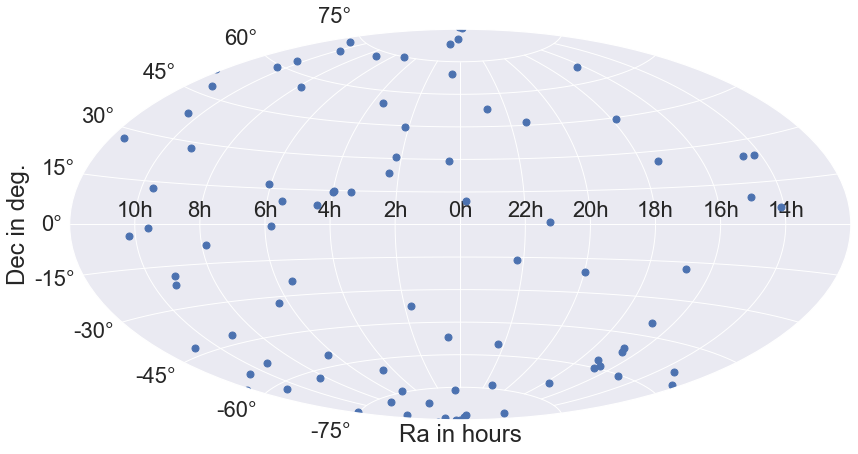

In [44]:
#plt.style.use('dark_background')
plt.figure(figsize=(14, 14))
plt.subplot(projection="aitoff")
plt.plot(ra,dec,marker='o', linestyle='None', markersize=7,)


plt.xticks(ticks=np.radians([-150, -120, -90, -60, -30, 0, \
                             30, 60, 90, 120, 150]),
           labels=['10h', '8h', '6h', '4h', '2h', '0h', \
                   '22h', '20h', '18h', '16h', '14h'])

plt.xlabel('Ra in hours')
plt.ylabel('Dec in deg.')
#plt.legend()
plt.grid(True)

In [45]:
# now to find the distances, Astropy calculation allows for a few cosmologies with best estimate or custom cosmologies.
# here I'm using Friedmann-Lemaitre-Robertson-Walker cosmology which accounts for hubble constant evolution calcuation
m = np.linspace(1.576503,10,100)
m1 = np.linspace(0,100,100)
m2 = np.linspace(2,2,1000)
#print(cosmo.H(7))
#print(cosmo.H(0), cosmo.Ob(7))
l = cosmo.comoving_distance(m1)
n  = cosmo.lookback_distance(m1)
#print(len(x_pc)
#l.to(u.pc)
np.max(n)

<Quantity 4122.4166856 Mpc>

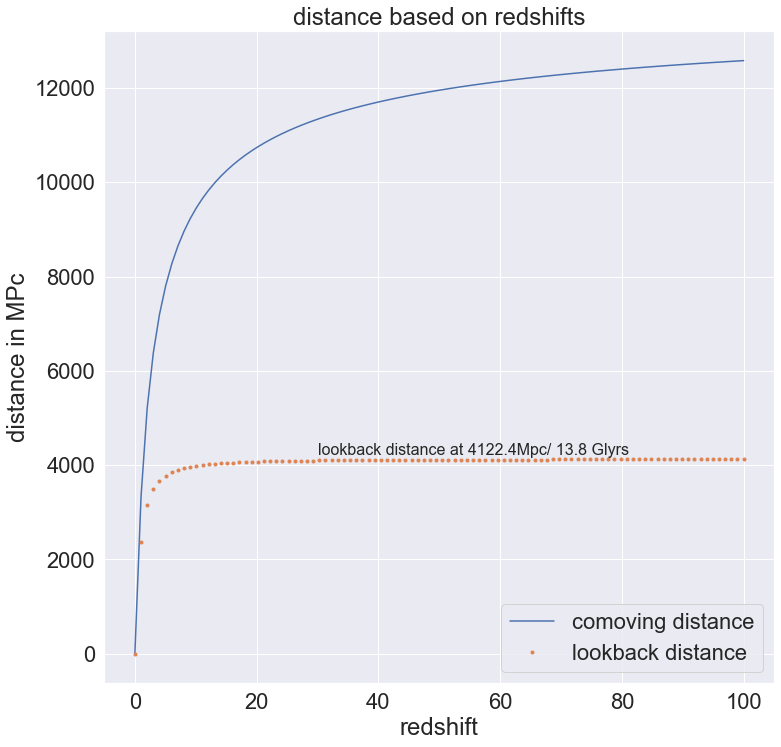

In [46]:
# Testing to see if the expected values for lookback distance (photon distance) and comoving distance (physical space like distance between a target and us) become asymptotic
plt.figure(figsize=(12, 12))
#plt.rcParams.update({'font.size': 20})

plt.plot(m1,l, label = 'comoving distance')
plt.plot(m1,n,'.', label = 'lookback distance' )
plt.xlabel('redshift')
plt.ylabel('distance in MPc')
plt.title('distance based on redshifts')
plt.annotate("lookback distance at 4122.4Mpc/ 13.8 Glyrs", (30, 4222))

plt.legend(loc = 'lower right')


In [47]:
arr = np.linspace(0,75,75)
finaldf = copy_XR_matched_1.copy()
findaldf = finaldf.reset_index(drop=True, inplace=True)
red = copy_XR_matched_1['redshift']
red_arr = red.to_numpy()
finaldf['distance'] = cosmo.comoving_distance(5.355512e-01)
red_arr
len(finaldf[finaldf['knc']==1])

177

In [48]:
for index in finaldf.index:
    finaldf['distance'][index] = cosmo.comoving_distance(finaldf['redshift'][index])
    

C:\Users\Zeruel\AppData\Local\Temp/ipykernel_14680/1919970240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finaldf['distance'][index] = cosmo.comoving_distance(finaldf['redshift'][index])


In [49]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

finaldf

objid          ra        dec         u         g         r  \
0    1237651252016644564  117.938129  41.259972  20.40018  19.76607  19.00008   
1    1237651273502294229  140.388771  60.473580  19.89626  18.93623  17.69030   
2    1237651538703679816  142.166641  60.419136  20.77789  19.58320  18.99182   
3    1237651538705383576  148.731996  62.692313  22.84815  22.11622  21.17945   
4    1237651539797344716  237.714533  56.797725  22.37254  21.39497  20.16076   
5    1237651540334411932  238.806114  56.737921  19.06080  18.77739  18.09453   
6    1237651540336902390  244.904299  52.198967  21.36115  21.34381  20.58084   
7    1237651753466921208  165.001377   1.998101  21.75746  21.23484  20.60796   
8    1237651754004250896  166.091078   2.457907  20.61474  20.25630  20.09532   
9    1237654029250920654  162.608498   1.860652  21.62790  20.54202  20.08948   
10   1237654342253412798  209.459430  61.719113  20.94455  20.24031  20.04449   
11   1237654381443416293  145.826049  55.137037  21.39068  20.67578  19.94971   
12   1237654602640326824  157.340955   5.327434  19.38852  19.63988  19.27934   
13   1237654653641818443  134.359461  48.755250  20.39399  20.02582  19.64962   
14   1237654875357184051  168.634027  63.465387  20.30703  19.40495  19.00339   
15   1237654880739131591  219.768829   4.474388  19.28261  18.80171  18.14723   
16   1237655106765979843  179.014458  58.784967  20.32906  19.25204  17.86491   
17   1237655107300163710  167.333096  58.006036  19.18058  18.26845  17.71155   
18   1237655108373315776  164.482310  58.432867  21.57523  20.57735  19.64133   
19   1237655123944407178  204.915057   3.519407  19.83463  19.04023  18.07179   
20   1237655124477083787  195.231415   4.097741  19.39690  19.22884  18.39928   
21   1237655348353958199  236.252258  50.243974  21.33053  20.77538  19.85185   
22   1237655463231225912  182.161943  61.366033  18.56321  18.31952  18.50443   
23   1237657190903840948  356.865095  -0.150958  23.41584  22.48722  21.27012   
24   1237657191446085744    9.112441   0.217707  20.34213  19.91396  19.73369   
25   1237657220949934109  164.039503  55.266918  20.64446  19.65127  19.22922   
26   1237657221487722670  167.447090  56.361352  21.17694  20.21287  20.09749   
27   1237657589247705382  177.531422  53.783436  21.35229  20.43286  19.07023   
28   1237657589780316325  161.416101  52.039547  21.29655  20.23766  18.99716   
29   1237657590856351847  169.509116  54.311302  20.11792  19.78517  19.77551   
30   1237657591389487911  155.737355  52.101178  21.58575  20.30374  19.05734   
31   1237657591932584167  179.135371  55.990482  20.69801  19.99757  19.19286   
32   1237657627915976954  175.365835  51.042263  20.94823  20.60127  20.16151   
33   1237657628436136242  127.699022  34.082679  21.88164  20.65668  19.37266   
34   1237657629503389759  115.016233  24.104412  20.48540  20.32964  20.04954   
35   1237657630051860919  138.416001  42.409439  23.34869  21.70171  19.75267   
36   1237657630592860382  149.443987  47.763722  20.13341  19.84273  19.44248   
37   1237657630598365338  167.776474  52.137352  20.46898  20.06653  19.92643   
38   1237657630605312114  193.880674  53.153585  19.75865  19.44700  19.46028   
39   1237657874870632527  153.424522  45.987826  19.22174  19.18740  18.88888   
40   1237658302739579207  151.301376  54.544760  21.69610  21.24249  20.25250   
41   1237658304350257269  150.336224  55.898794  17.21677  17.08855  16.90187   
42   1237658312945500195  204.947071  59.202887  21.09358  20.17001  19.05414   
43   1237658425156043081  140.596634   6.458434  20.80527  20.25804  19.94704   
44   1237658425165218036  161.703065   8.055359  21.57436  20.85169  19.69419   
45   1237658491205386675  179.476379   8.750384  23.37092  21.40066  19.99745   
46   1237658493888888967  177.482553  10.792904  20.97072  19.77557  19.01594   
47   1237658613050048631  154.182177  45.847555  19.59434  19.45710  18.96104   
48   1237658803115458609  199.887611  55.135721  1

In [50]:
coord3d= SkyCoord(ra=finaldf['ra']*u.degree, dec=finaldf['dec']*u.degree, distance=finaldf['distance'])

In [51]:
x_pc = coord3d.cartesian.x.value
y_pc = coord3d.cartesian.y.value
z_pc = coord3d.cartesian.z.value

In [52]:
#using plotly to setup a rotating and interactive 3d scatter plot
import plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.io as pio
template = pio.templates

# Configure Plotly to be rendered inline in the notebook.
plotly.offline.init_notebook_mode()

# Configure the trace.
XR_LOC = go.Scatter3d(
    name = 'predicted blazars',
    x=x_pc,  
    y=y_pc,
    z=z_pc,
    mode='markers',
    marker={
        'color':m2,
        'colorscale':'magma',
        'size': 5,
        'opacity': 0.8,
        
    }
)
WE_LOC = go.Scatter3d(
    name = 'Us',
    x=[0],
    y=[0],
    z=[0],
    mode='markers',
    marker={
        'color': m2,
        'colorscale':'blues',
        'size': 7,
        'opacity': 1,
        'symbol' : 'cross'
    }
)

# Configure the layout.
layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
)

data = [XR_LOC]
data1 = [WE_LOC]


fig = make_subplots()
fig.add_trace(XR_LOC)
fig.add_trace(WE_LOC)

# plot_figure = go.Figure(data=data, layout=layout)
# plot_figure.add = go.Figure(data = data1, layout=layout)

#plotly.offline.iplot(fig)
#fig.show()
x_view = 1.5
y_view = 1.5
z_view = 0.2
fig.update_layout(scene = dict(
                    xaxis_title='X(Mpc)',
                    yaxis_title='Y(Mpc)',
                    zaxis_title='Z(Mpc)'),
                    width=800)
                    #margin=dict(r=20, b=10, l=10, t=10))
fig.update_layout(
         template='plotly',
         title='Comoving distance from cross match predictions of individual classifiers',
         width=1000,
         height=1200,
         scene_camera_eye=dict(x=x_view, y=y_view, z=z_view),
         updatemenus=[dict(type='buttons',
                  showactive=False,
                  y=1,
                  x=0.8,
                  xanchor='left',
                  yanchor='bottom',
                  pad=dict(t=45, r=10),
                  buttons=[dict(label='Play',
                                 method='animate',
                                 args=[None, dict(frame=dict(duration=15, redraw=True), 
                                                             transition=dict(duration=0),
                                                             fromcurrent=True,
                                                             mode='immediate'
                                                            )]
                                            )
                                      ]
                              )
                        ]
)

def rotate_z(x, y, z, theta):
    w = x+1j*y
    return np.real(np.exp(1j*theta)*w), np.imag(np.exp(1j*theta)*w), z

frames=[]
for t in np.arange(0, 6, 0.01):
    xe, ye, ze = rotate_z(x_view, y_view, z_view, -t)
    frames.append(go.Frame(layout=dict(scene_camera_eye=dict(x=xe, y=ye, z=ze))))
fig.frames=frames

fig.show()

In [53]:

#Zero_dropped = CLASSED_SDSS_TRAIN[CLASSED_SDSS_TRAIN['peak']>0]
#Zero_dropped = CLASSED_SDSS_TRAIN[CLASSED_SDSS_TRAIN['redshift']>0]
nonan = CLASSED_SDSS_TRAIN.dropna(axis=0, how='any')
shuf = nonan.sample(frac=1)
%store shuf

Stored 'shuf' (DataFrame)


In [54]:
%store shuf

Stored 'shuf' (DataFrame)


In [55]:
# snsXR = pd.DataFrame(CLASSED_SDSS_XR_unmatchedf,columns=['Log_R_Flux','u-g','g-z','redshift','a_Rr','a_ri','a_Ru','a_ru','a_iu','petroFlux_g'])

# sns.pairplot(snsXR, height = 2)
